# Bredth first search

In [1]:
import queue
import time
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def order_bfs(graph, start_node):
    # A set that keeps track of already visited nodes
    visited = set()
    
    # FIFO (FIRST IN FIRST OUT)
    q = queue.Queue()
    q.put(start_node)
    
    # Nodes in the bredth first search order
    order = []
    
    while not q.empty():
        # Get the node
        vertex = q.get()
        
        # If the node has not been visited 
        if vertex not in visited:
            order.append(vertex)
            visited.add(vertex)
            
            # Then go through all the neighbouring nodes
            for node in graph[vertex]:
                if node not in visited:
                    q.put(node)
                    
    return order

In [3]:
def visualise_search(order, graph, pos):
    
    # Calculate the correct number of rows for subplots
    num_rows = len(order) // 3 + int(len(order) % 3 > 0)
    fig, axes = plt.subplots(num_rows, 3, figsize=(10, 15))
    axes = axes.ravel()  # Flatten the axes array for easier indexing
    
    for i, node in enumerate(order):
        ax = axes[i]  # Use the current axis for plotting
        ax.clear()  # Clear the current axis
        ax.set_title(f"Iteration {i}")
        nx.draw(graph, pos, ax=ax, with_labels=True, node_color=['r' if n == node else 'g' for n in graph.nodes])
    plt.title("Depth First")
        
    plt.show()

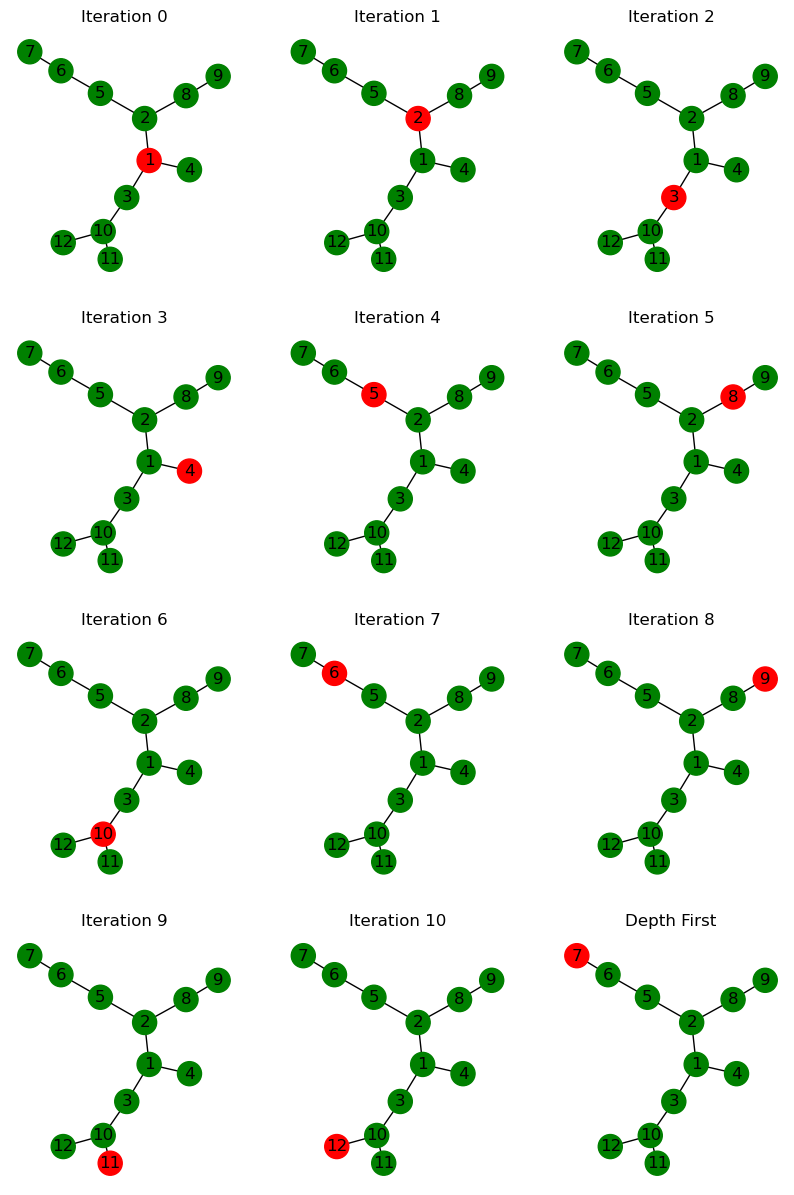

In [5]:
G = nx.Graph()
G.add_edges_from([('1','2'),('1','3'),('1','4'),('2','5'),('5','6'),('6','7'),('2','8'),('8','9'),('3','10'),('10','11'),('10','12')])
pos = nx.spring_layout(G)

visualise_search(order_bfs(G,'1'), G, pos)